In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("employeesal.xlsx")
df.head()

,Experience(Y),Salary(rs)
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [3]:
df.shape
print(df.columns)
x=df.iloc[:, 0:1].values
y=df.iloc[:,1].values

Index(['Experience(Y)', 'Salary(rs)'], dtype='object')


In [4]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x,y)


LinearRegression()

In [5]:
y_pred=linear_reg.predict(x)

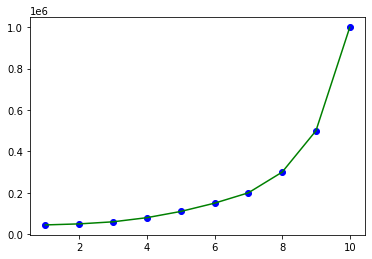

In [6]:
plt.scatter(x,y,color="blue")


plt.plot(x,y,color="green")


#### Transforming features 

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

#### Now performing Linear regression on transformed features

In [8]:
poly_reg=LinearRegression()
poly_reg.fit(x_poly,y)

LinearRegression()

In [9]:
y_poly_pred=poly_reg.predict(x_poly)

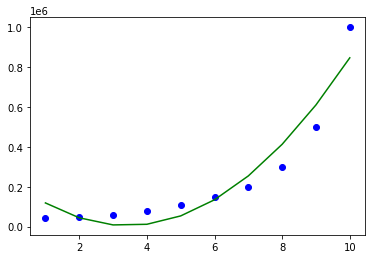

In [10]:
plt.scatter(x,y,color="blue")


plt.plot(x,y_poly_pred,color="green")

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression().fit(x_train,y_train)
ypred_linear=model_linear.predict(x_test)


from sklearn.metrics import r2_score
print("r2_score for liner regression is ",r2_score(y_test,ypred_linear))

r2_score for liner regression is  0.9779215014976274


In [13]:
# Transform
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly_r2=poly.fit_transform(x_train)


In [14]:
poly_reg_score=LinearRegression().fit(x_poly_r2,y_train)
ypred_poly=poly_reg_score.predict(poly.fit_transform(x_test))



In [15]:
from sklearn.metrics import r2_score
print("r2_score for liner regression is ",r2_score(y_test,ypred_poly))

r2_score for liner regression is  0.7054806877204746
